In [1]:
import numpy as np
import galpro as gp
from astropy.table import Table
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numba
from numba import njit, prange
sns.set()

In [2]:
# Lectura de datos
sdss_f = Table.read('firefly.fits')
sdss_f = sdss_f.to_pandas()
sdss_f.describe()

,objid,modelmag_u,modelmag_g,modelmag_r,modelmag_i,modelmag_z,modelMagErr_u,modelMagErr_g,modelMagErr_r,modelMagErr_i,...,Chabrier_MILES_age_lightW_low_1sig,Chabrier_MILES_total_mass,Chabrier_MILES_total_mass_up_1sig,Chabrier_MILES_total_mass_low_1sig,Z_NOQSO,Z_ERR_NOQSO,w1mag,w2mag,w1sigmag,w2sigmag
count,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,...,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06
mean,1.237664e+18,2.190825e+01,2.019960e+01,1.900446e+01,1.828134e+01,1.783241e+01,4.860968e-01,3.034060e-02,4.778364e-02,4.400825e-03,...,4.012871e+09,8.645808e+11,1.601401e+12,5.619350e+11,3.622103e-01,3.451672e-04,1.474408e+01,1.476648e+01,2.772285e+01,5.320650e+02
std,8.071345e+12,3.068943e+01,2.976252e+01,1.951369e+00,1.667261e+01,2.574329e+01,3.053414e+01,2.961587e+01,9.505250e-02,1.655559e+01,...,2.883227e+09,1.990488e+14,3.076646e+14,1.402744e+14,2.643933e-01,1.232947e-02,1.811691e+01,4.675645e+01,5.249987e+02,2.276397e+03
min,1.237646e+18,-9.999000e+03,-9.999000e+03,1.093223e+01,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,1.460256e-03,-9.999000e+03,...,3.150416e+07,6.569957e+00,3.515474e+01,2.687851e+00,7.629748e-06,2.755609e-08,7.754000e+00,6.456000e+00,5.000000e-03,5.000000e-03
25%,1.237658e+18,1.988576e+01,1.824849e+01,1.739374e+01,1.696370e+01,1.665336e+01,7.206018e-02,9.186987e-03,6.719161e-03,6.715965e-03,...,1.730767e+09,1.913292e+10,3.414572e+10,1.117989e+10,1.169350e-01,2.158676e-05,1.404600e+01,1.385200e+01,2.100000e-02,5.200000e-02
50%,1.237663e+18,2.222300e+01,2.061859e+01,1.898842e+01,1.835936e+01,1.797100e+01,3.989745e-01,4.632830e-02,1.808464e-02,1.604225e-02,...,3.629944e+09,5.513953e+10,8.476884e+10,3.404705e+10,3.345541e-01,6.376094e-05,1.472700e+01,1.457500e+01,3.800000e-02,1.010000e-01
75%,1.237668e+18,2.381873e+01,2.222643e+01,2.066218e+01,1.967993e+01,1.921976e+01,9.319945e-01,1.517605e-01,6.110542e-02,3.880709e-02,...,5.978926e+09,1.194992e+11,1.651541e+11,7.568667e+10,5.570847e-01,1.487330e-04,1.539800e+01,1.528100e+01,7.000000e-02,1.990000e-01
max,1.237681e+18,3.345042e+01,3.210238e+01,3.199010e+01,3.210178e+01,2.955640e+01,3.687848e+01,4.114543e+01,2.496444e+01,5.515096e+01,...,1.482509e+10,1.761312e+17,2.540280e+17,1.242000e+17,1.889876e+00,1.821217e+00,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03


In [3]:
len(sdss_f)

1823940

In [4]:
sdss_f.columns

Index(['objid', 'modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i',
       'modelmag_z', 'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r',
       'modelMagErr_i', 'modelMagErr_z', 'Chabrier_MILES_age_lightW',
       'Chabrier_MILES_age_lightW_up_1sig',
       'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_total_mass',
       'Chabrier_MILES_total_mass_up_1sig',
       'Chabrier_MILES_total_mass_low_1sig', 'Z_NOQSO', 'Z_ERR_NOQSO', 'w1mag',
       'w2mag', 'w1sigmag', 'w2sigmag'],
      dtype='object')

In [61]:
# Busqueda de duplicados
flag = np.sum(sdss_f['objid'].duplicated())
if flag > 0:
    print('Hay duplicados: ', flag)
else:
    print('No hay duplicados')

Hay duplicados:  19526


In [3]:
# Elimnando duplicados
sdss_f = sdss_f.drop_duplicates(subset=['objid'])
len(sdss_f)

1804414

In [7]:
# Valores negativos en cada columna
np.sum(sdss_f < 0, axis=0)

objid                                  0
modelmag_u                            16
modelmag_g                            15
modelmag_r                             0
modelmag_i                             5
modelmag_z                            11
modelMagErr_u                         16
modelMagErr_g                         15
modelMagErr_r                          0
modelMagErr_i                          5
modelMagErr_z                         11
Chabrier_MILES_age_lightW              0
Chabrier_MILES_age_lightW_up_1sig      0
Chabrier_MILES_age_lightW_low_1sig     0
Chabrier_MILES_total_mass              0
Chabrier_MILES_total_mass_up_1sig      0
Chabrier_MILES_total_mass_low_1sig     0
Z_NOQSO                                0
Z_ERR_NOQSO                            0
w1mag                                  0
w2mag                                  0
w1sigmag                               0
w2sigmag                               0
dtype: int64

In [4]:
sdss_f = sdss_f[sdss_f['modelmag_u'] > 0]
sdss_f = sdss_f[sdss_f['modelmag_g'] > 0]
sdss_f = sdss_f[sdss_f['modelmag_i'] > 0]
sdss_f = sdss_f[sdss_f['modelmag_z'] > 0]
sdss_f = sdss_f[sdss_f['modelMagErr_u'] > 0]
sdss_f = sdss_f[sdss_f['modelMagErr_g'] > 0]
sdss_f = sdss_f[sdss_f['modelMagErr_i'] > 0]
sdss_f = sdss_f[sdss_f['modelMagErr_z'] > 0]
len(sdss_f)

1804393

In [9]:
# Valores nan en cada columna
np.sum(sdss_f.isnull(), axis=0)

objid                                 0
modelmag_u                            0
modelmag_g                            0
modelmag_r                            0
modelmag_i                            0
modelmag_z                            0
modelMagErr_u                         0
modelMagErr_g                         0
modelMagErr_r                         0
modelMagErr_i                         0
modelMagErr_z                         0
Chabrier_MILES_age_lightW             0
Chabrier_MILES_age_lightW_up_1sig     0
Chabrier_MILES_age_lightW_low_1sig    0
Chabrier_MILES_total_mass             0
Chabrier_MILES_total_mass_up_1sig     0
Chabrier_MILES_total_mass_low_1sig    0
Z_NOQSO                               0
Z_ERR_NOQSO                           0
w1mag                                 0
w2mag                                 0
w1sigmag                              0
w2sigmag                              0
dtype: int64

In [10]:
# Eliminando valores nan
#mpa = mpa.dropna()
#len(mpa)

In [11]:
# Valores con códigos de error
np.sum(sdss_f[['w1mag','w2mag','w1sigmag','w2sigmag']] >= 9999, axis=0)

w1mag           5
w2mag          39
w1sigmag     5055
w2sigmag    97155
dtype: int64

In [5]:
# Eliminando valores con códigos de error
sdss_f = sdss_f[sdss_f['w1mag'] < 9999]
sdss_f = sdss_f[sdss_f['w2mag'] < 9999]
sdss_f = sdss_f[sdss_f['w1sigmag'] < 9999]
sdss_f = sdss_f[sdss_f['w2sigmag'] < 9999]
len(sdss_f)

1706024

In [6]:
sdss_f['Chabrier_MILES_total_mass'] = np.log10(sdss_f['Chabrier_MILES_total_mass'])

In [7]:
sdss_f.describe()

,objid,modelmag_u,modelmag_g,modelmag_r,modelmag_i,modelmag_z,modelMagErr_u,modelMagErr_g,modelMagErr_r,modelMagErr_i,...,Chabrier_MILES_age_lightW_low_1sig,Chabrier_MILES_total_mass,Chabrier_MILES_total_mass_up_1sig,Chabrier_MILES_total_mass_low_1sig,Z_NOQSO,Z_ERR_NOQSO,w1mag,w2mag,w1sigmag,w2sigmag
count,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,...,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06
mean,1.237664e+18,2.194572e+01,2.019002e+01,1.889357e+01,1.820431e+01,1.779686e+01,5.715419e-01,1.109844e-01,4.278202e-02,2.822954e-02,...,4.097973e+09,1.062573e+01,1.569972e+12,5.602665e+11,3.468210e-01,2.911634e-04,1.463359e+01,1.449066e+01,4.994986e-02,1.306706e-01
std,7.984774e+12,2.425621e+00,2.248644e+00,1.890730e+00,1.633562e+00,1.532704e+00,6.134901e-01,1.938771e-01,8.873199e-02,9.720356e-02,...,2.880594e+09,6.840610e-01,3.096320e+14,1.426668e+14,2.528726e-01,1.099007e-02,9.181427e-01,9.325591e-01,4.523345e-02,1.077251e-01
min,1.237646e+18,1.048895e+01,1.170025e+01,1.093223e+01,8.364965e+00,1.025513e+01,2.411008e-03,1.498525e-03,1.460256e-03,4.203200e-06,...,3.150416e+07,8.175625e-01,3.515474e+01,2.687851e+00,7.629748e-06,2.755609e-08,7.754000e+00,6.456000e+00,5.000000e-03,5.000000e-03
25%,1.237658e+18,1.984966e+01,1.822394e+01,1.737280e+01,1.694357e+01,1.663274e+01,7.019804e-02,9.044391e-03,6.637671e-03,6.634223e-03,...,1.830724e+09,1.029213e+01,3.410218e+10,1.182326e+10,1.153134e-01,2.117382e-05,1.402900e+01,1.383500e+01,2.100000e-02,5.100000e-02
50%,1.237663e+18,2.209757e+01,2.040102e+01,1.880098e+01,1.819280e+01,1.781509e+01,3.742546e-01,3.945540e-02,1.598275e-02,1.447576e-02,...,3.729901e+09,1.074672e+01,8.457678e+10,3.532052e+10,3.149167e-01,5.816620e-05,1.466400e+01,1.450900e+01,3.700000e-02,9.600000e-02
75%,1.237668e+18,2.377449e+01,2.211615e+01,2.053349e+01,1.957382e+01,1.911349e+01,9.249198e-01,1.409401e-01,5.519388e-02,3.588469e-02,...,5.978926e+09,1.108219e+01,1.654112e+11,7.771042e+10,5.391453e-01,1.431873e-04,1.530500e+01,1.519500e+01,6.400000e-02,1.780000e-01
max,1.237681e+18,3.177132e+01,3.210238e+01,3.199010e+01,3.210178e+01,2.951425e+01,3.687848e+01,4.114543e+01,2.496444e+01,5.515096e+01,...,1.482509e+10,1.724584e+01,2.540280e+17,1.242000e+17,1.889876e+00,1.821217e+00,1.800500e+01,1.740800e+01,5.420000e-01,5.430000e-01


<Figure size 432x288 with 0 Axes>

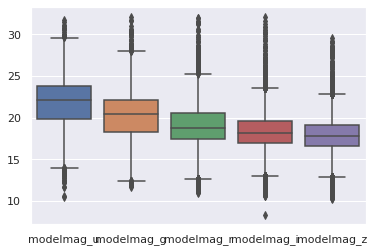

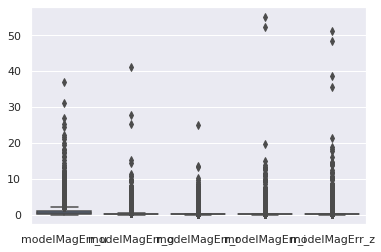

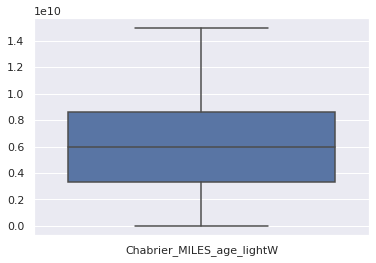

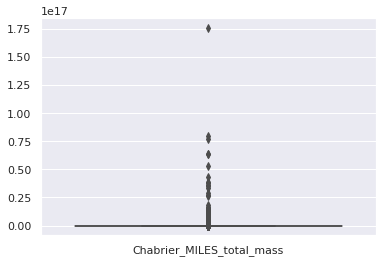

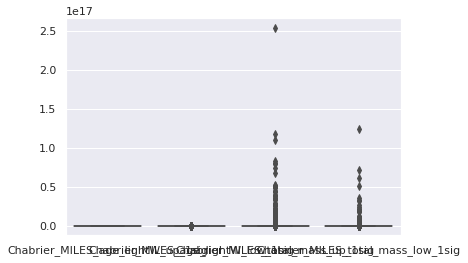

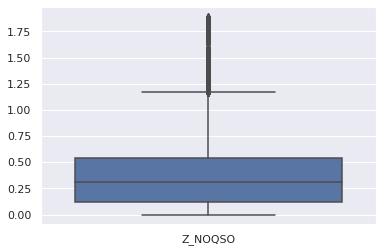

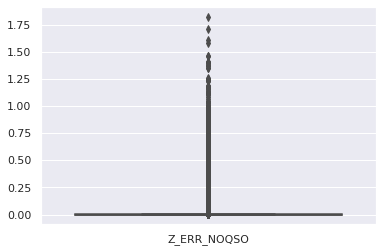

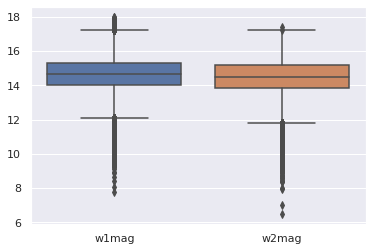

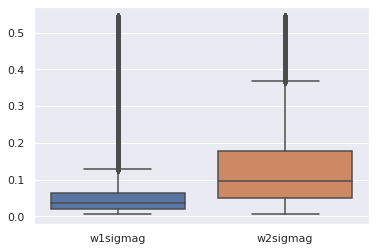

<Figure size 432x288 with 0 Axes>

In [7]:
# Visualización de outliers
plt.figure()
sns.boxplot(data=sdss_f[['modelmag_u','modelmag_g','modelmag_r','modelmag_i','modelmag_z']])
plt.figure()
sns.boxplot(data=sdss_f[['modelMagErr_u',
        'modelMagErr_g','modelMagErr_r','modelMagErr_i','modelMagErr_z']])
plt.figure()
sns.boxplot(data=sdss_f[['Chabrier_MILES_age_lightW']])
plt.figure()
sns.boxplot(data=sdss_f[['Chabrier_MILES_total_mass']])
plt.figure()
sns.boxplot(data=sdss_f[['Chabrier_MILES_age_lightW_up_1sig',
        'Chabrier_MILES_age_lightW_low_1sig',
        'Chabrier_MILES_total_mass_up_1sig',
        'Chabrier_MILES_total_mass_low_1sig']])
plt.figure()
sns.boxplot(data=sdss_f[['Z_NOQSO']])
plt.figure()
sns.boxplot(data=sdss_f[['Z_ERR_NOQSO']])
plt.figure()
sns.boxplot(data=sdss_f[['w1mag','w2mag']])
plt.figure()
sns.boxplot(data=sdss_f[['w1sigmag','w2sigmag']])
plt.figure()

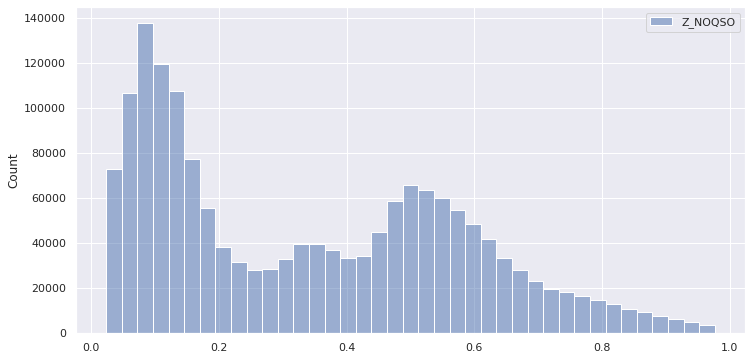

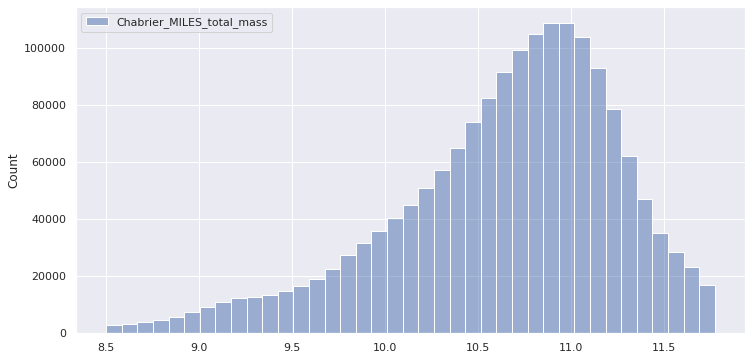

In [10]:
# Distribuciones de las características objetivos (redshift y masa)
lista = ['Z_NOQSO','Chabrier_MILES_total_mass']
for i in lista:
    limsup = np.quantile(np.array(sdss_f[i]),q=0.99)
    liminf = np.quantile(np.array(sdss_f[i]),q=0.01)
    bines= np.linspace(liminf,limsup,40)
    plt.figure(figsize=(12,6))
    sns.histplot(sdss_f[[i]],bins=bines)

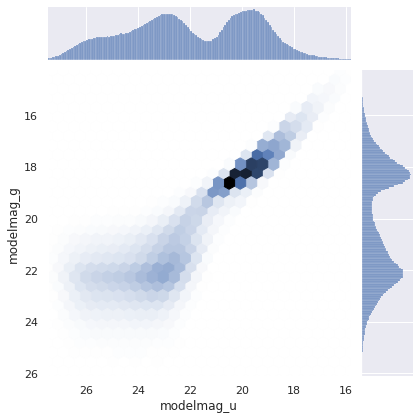

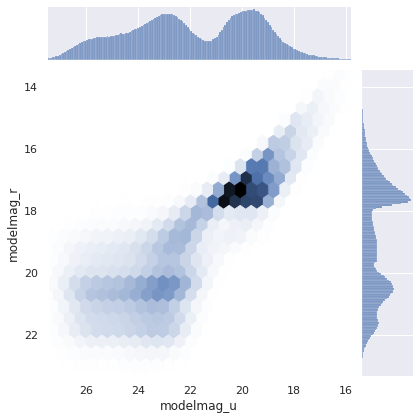

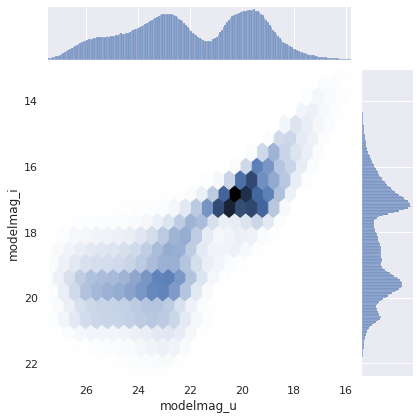

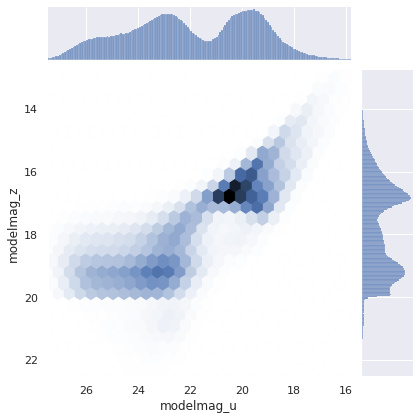

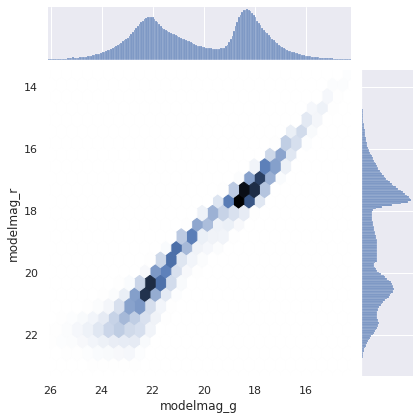

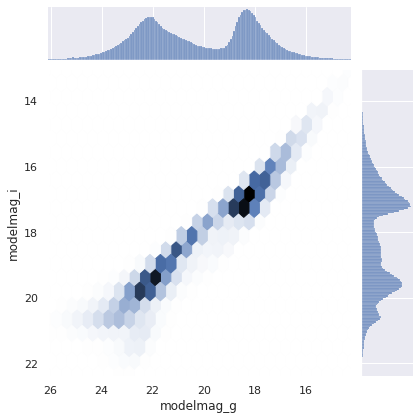

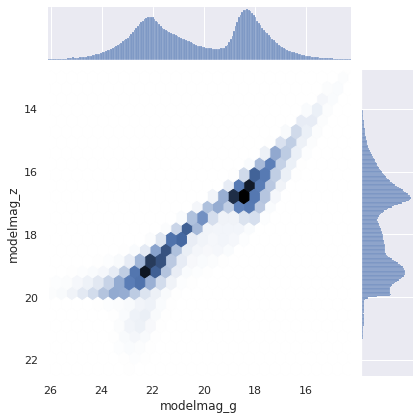

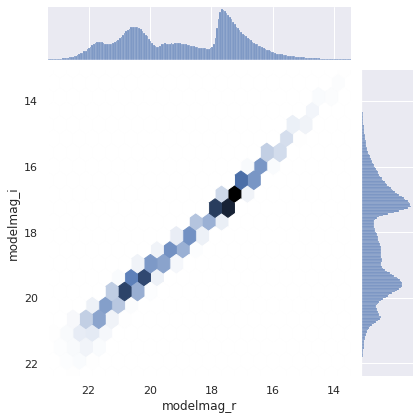

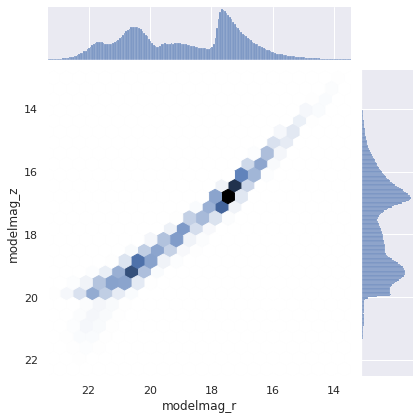

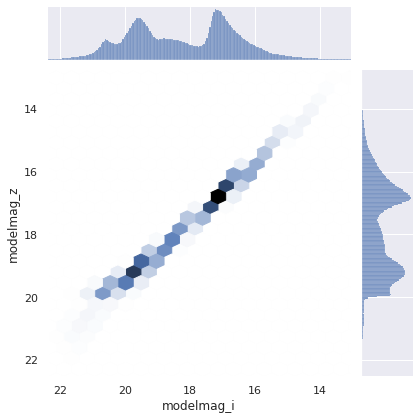

In [8]:
# Distribuciones de las magnitudes u, g, r, i, z
limsup_u = np.quantile(np.array(sdss_f['modelmag_u']),q=0.999)
liminf_u = np.quantile(np.array(sdss_f['modelmag_u']),q=0.001)
limsup_g = np.quantile(np.array(sdss_f['modelmag_g']),q=0.999)
liminf_g = np.quantile(np.array(sdss_f['modelmag_g']),q=0.001)
limsup_r = np.quantile(np.array(sdss_f['modelmag_r']),q=0.999)
liminf_r = np.quantile(np.array(sdss_f['modelmag_r']),q=0.001)
limsup_i = np.quantile(np.array(sdss_f['modelmag_i']),q=0.999)
liminf_i = np.quantile(np.array(sdss_f['modelmag_i']),q=0.001)
limsup_z = np.quantile(np.array(sdss_f['modelmag_z']),q=0.999)
liminf_z = np.quantile(np.array(sdss_f['modelmag_z']),q=0.001)
sns.jointplot(x=sdss_f['modelmag_u'],y=sdss_f['modelmag_g'],kind='hex',
              xlim=(limsup_u,liminf_u),ylim=(limsup_g,liminf_g))
sns.jointplot(x=sdss_f['modelmag_u'],y=sdss_f['modelmag_r'],kind='hex',
              xlim=(limsup_u,liminf_u),ylim=(limsup_r,liminf_r))
sns.jointplot(x=sdss_f['modelmag_u'],y=sdss_f['modelmag_i'],kind='hex',
              xlim=(limsup_u,liminf_u),ylim=(limsup_i,liminf_i))
sns.jointplot(x=sdss_f['modelmag_u'],y=sdss_f['modelmag_z'],kind='hex',
              xlim=(limsup_u,liminf_u),ylim=(limsup_z,liminf_z))
sns.jointplot(x=sdss_f['modelmag_g'],y=sdss_f['modelmag_r'],kind='hex',
              xlim=(limsup_g,liminf_g),ylim=(limsup_r,liminf_r))
sns.jointplot(x=sdss_f['modelmag_g'],y=sdss_f['modelmag_i'],kind='hex',
              xlim=(limsup_g,liminf_g),ylim=(limsup_i,liminf_i))
sns.jointplot(x=sdss_f['modelmag_g'],y=sdss_f['modelmag_z'],kind='hex',
              xlim=(limsup_g,liminf_g),ylim=(limsup_z,liminf_z))
sns.jointplot(x=sdss_f['modelmag_r'],y=sdss_f['modelmag_i'],kind='hex',
              xlim=(limsup_r,liminf_r),ylim=(limsup_i,liminf_i))
sns.jointplot(x=sdss_f['modelmag_r'],y=sdss_f['modelmag_z'],kind='hex',
              xlim=(limsup_r,liminf_r),ylim=(limsup_z,liminf_z))
sns.jointplot(x=sdss_f['modelmag_i'],y=sdss_f['modelmag_z'],kind='hex',
              xlim=(limsup_i,liminf_i),ylim=(limsup_z,liminf_z))

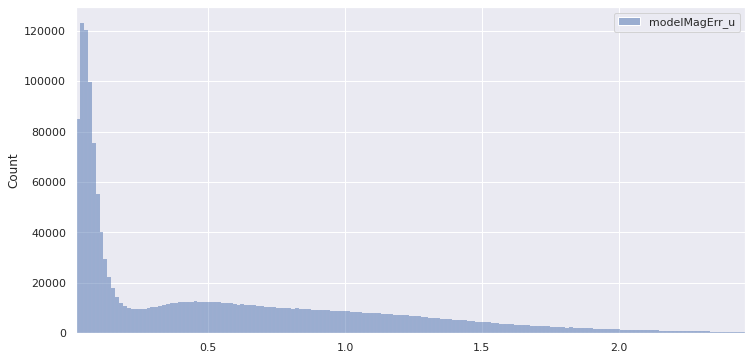

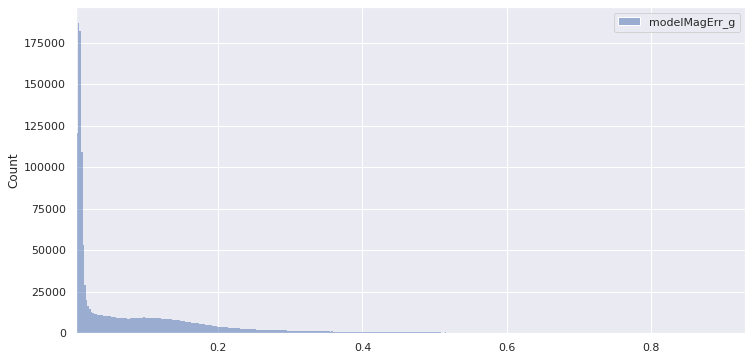

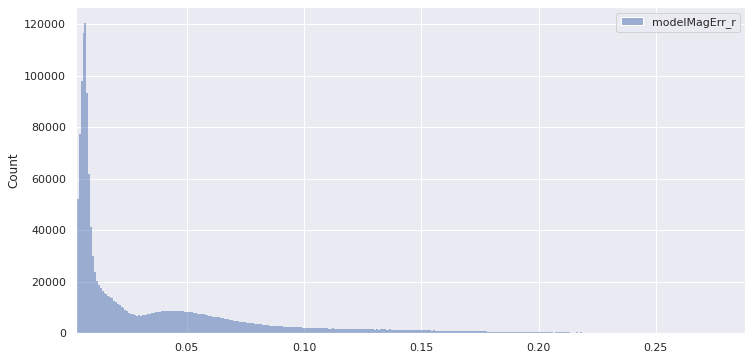

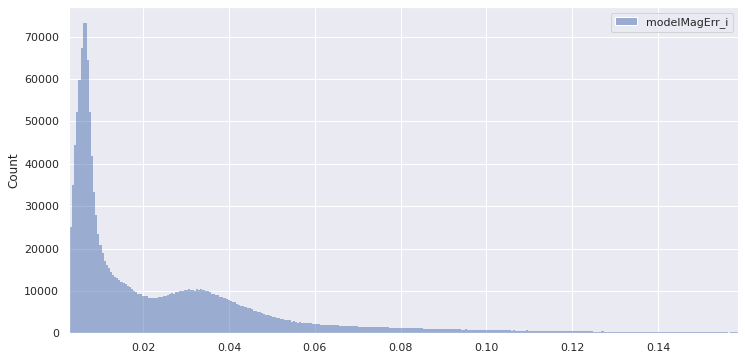

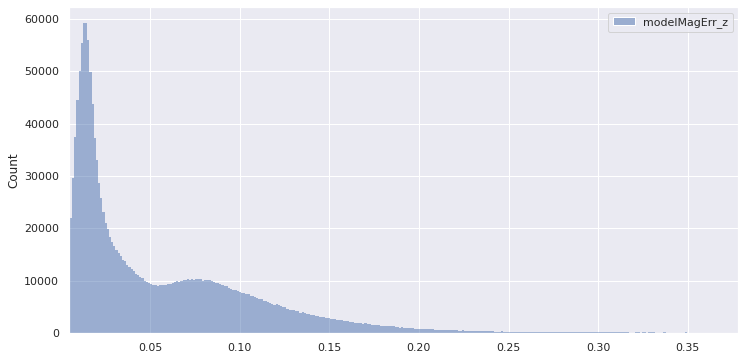

In [6]:
# Distribuciones de los errores de las magnitudes u, g, r, i, z
lista = ['modelMagErr_u','modelMagErr_g','modelMagErr_r','modelMagErr_i','modelMagErr_z']
for i in lista:
    limsup = np.quantile(np.array(sdss_f[i]),q=0.99)
    liminf = np.quantile(np.array(sdss_f[i]),q=0.01)
    plt.figure(figsize=(12,6))
    g = sns.histplot(sdss_f[[i]])
    g.set_xlim(liminf,limsup)

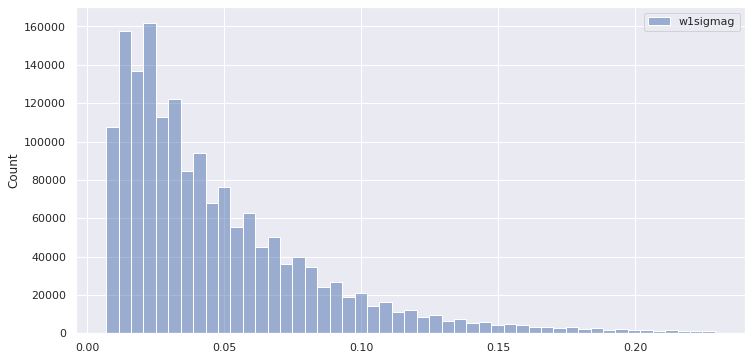

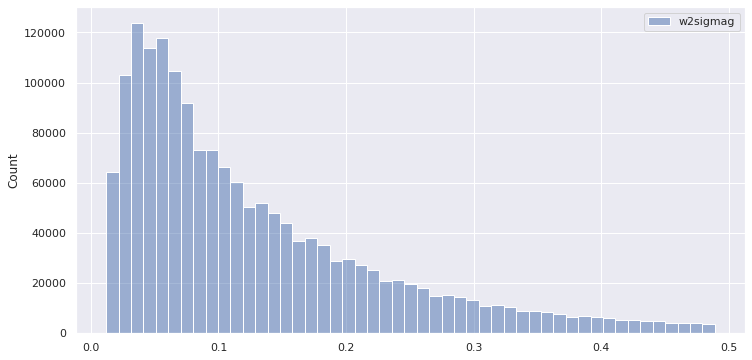

In [10]:
# Distribuciones de errores en w1 y w2
lista = ['w1sigmag','w2sigmag']
for i in lista:
    limsup = np.quantile(np.array(sdss_f[i]),q=0.99)
    liminf = np.quantile(np.array(sdss_f[i]),q=0.01)
    bines= np.linspace(liminf,limsup,50)
    plt.figure(figsize=(12,6))
    sns.histplot(sdss_f[[i]],bins=bines)

In [7]:
# Se calculan los colores y sus errores
sdss_f['u-g'] = sdss_f['modelmag_u'] - sdss_f['modelmag_g']
sdss_f['g-r'] = sdss_f['modelmag_g'] - sdss_f['modelmag_r']
sdss_f['r-i'] = sdss_f['modelmag_r'] - sdss_f['modelmag_i']
sdss_f['i-z'] = sdss_f['modelmag_i'] - sdss_f['modelmag_z']
sdss_f['r-w1'] = sdss_f['modelmag_r'] - sdss_f['w1mag']
sdss_f['u-g_err'] = np.sqrt(sdss_f['modelMagErr_u']**2 + sdss_f['modelMagErr_g']**2)
sdss_f['g-r_err'] = np.sqrt(sdss_f['modelMagErr_g']**2 + sdss_f['modelMagErr_r']**2)
sdss_f['r-i_err'] = np.sqrt(sdss_f['modelMagErr_r']**2 + sdss_f['modelMagErr_i']**2)
sdss_f['i-z_err'] = np.sqrt(sdss_f['modelMagErr_i']**2 + sdss_f['modelMagErr_z']**2)
sdss_f['r-w1_err'] = np.sqrt(sdss_f['modelMagErr_r']**2 + sdss_f['w1sigmag']**2)

In [56]:
#sdss_f = Table.from_pandas(sdss_f)
#sdss_f.write('sdss_firefly.fits', overwrite='True')

In [8]:
ind_var = sdss_f.drop(['objid', 'Chabrier_MILES_age_lightW',
       'Chabrier_MILES_age_lightW_up_1sig',
       'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_total_mass',
       'Chabrier_MILES_total_mass_up_1sig',
       'Chabrier_MILES_total_mass_low_1sig', 'Z_NOQSO', 'Z_ERR_NOQSO'], axis=1)

### Análisis PCA 

In [8]:
ss = StandardScaler()
datanorm = ss.fit_transform(ind_var)
ind_var.columns

Index(['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag', 'u-g', 'g-r',
       'r-i', 'i-z', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err'],
      dtype='object')

In [9]:
pca = PCA()
pca.fit(datanorm)
comp = pca.transform(datanorm)
mean = pca.mean_
components = pca.components_
var = pca.explained_variance_ratio_
var = np.cumsum(var)

Text(0, 0.5, '% Varianza Acumulada')

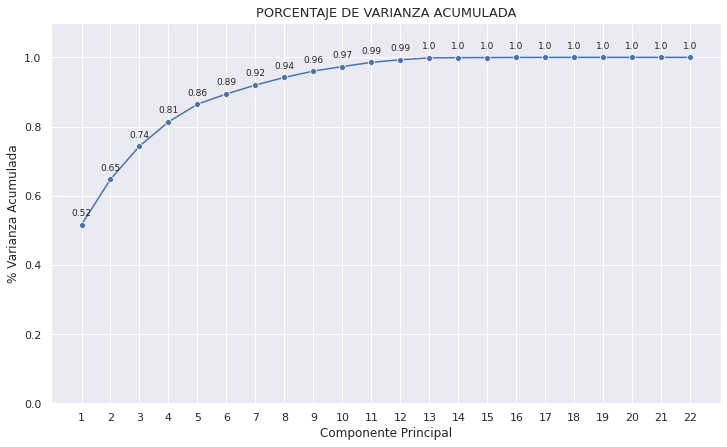

In [10]:
# Gráfico de las componentes principales
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
fig = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax = sns.lineplot(x=np.arange(len(var)) + 1, y=var, marker='o', data=pca, 
                  legend='brief')

for x, y in zip(np.arange(len(var))+1, var):
    label = round(y, 2)
    ax.annotate(round(y, 2), (x,y), textcoords="offset points", xytext=(0,9), ha='center', fontsize=9)

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_)+1)
ax.set_title('PORCENTAJE DE VARIANZA ACUMULADA', fontsize=13)
ax.set_xlabel('Componente Principal')
ax.set_ylabel('% Varianza Acumulada')

In [11]:
pca = PCA(n_components=13)
pca.fit(datanorm)
comp = pca.transform(datanorm)

componentes = pd.DataFrame(abs(pca.components_),columns=ind_var.columns)
componentes

,modelmag_u,modelmag_g,modelmag_r,modelmag_i,modelmag_z,modelMagErr_u,modelMagErr_g,modelMagErr_r,modelMagErr_i,modelMagErr_z,...,w1sigmag,w2sigmag,u-g,g-r,r-i,i-z,u-g_err,g-r_err,r-i_err,i-z_err
0,0.246546,0.282715,0.284450,0.281473,0.274951,0.204000,0.220431,0.192493,0.119457,0.150976,...,0.197778,0.215141,0.033300,0.172098,0.224434,0.144494,0.217804,0.225793,0.166622,0.153280
1,0.236418,0.126093,0.083374,0.068276,0.081093,0.207068,0.107598,0.301179,0.415133,0.229462,...,0.025881,0.027043,0.256107,0.221303,0.132637,0.048024,0.171404,0.176868,0.421713,0.387022
2,0.121123,0.012942,0.077503,0.117544,0.169600,0.242815,0.209321,0.132223,0.120925,0.127047,...,0.358240,0.316231,0.233823,0.308731,0.130836,0.255717,0.265459,0.215297,0.152889,0.019273
3,0.184732,0.063732,0.042542,0.014861,0.033966,0.261721,0.287461,0.102125,0.190390,0.336029,...,0.010882,0.032688,0.522421,0.110522,0.161558,0.287361,0.212756,0.257350,0.077380,0.367740
4,0.101423,0.012295,0.030645,0.069418,0.008249,0.036944,0.265874,0.030157,0.358897,0.506040,...,0.096836,0.104203,0.241742,0.150446,0.159541,0.474466,0.076699,0.213792,0.254000,0.179276
5,0.060620,0.189148,0.081002,0.136641,0.119756,0.176014,0.052577,0.500209,0.267627,0.084434,...,0.217613,0.181805,0.245828,0.478419,0.201548,0.149297,0.179121,0.178555,0.064109,0.239485
6,0.226444,0.142355,0.202310,0.140975,0.173876,0.367276,0.196098,0.266914,0.073117,0.044765,...,0.295542,0.264333,0.202434,0.109697,0.437919,0.136300,0.380999,0.092303,0.089286,0.010673
7,0.197360,0.042645,0.114522,0.097285,0.135153,0.383006,0.287701,0.047104,0.118121,0.172315,...,0.257326,0.223992,0.507592,0.212052,0.165733,0.181549,0.306847,0.228303,0.112093,0.061314
8,0.028062,0.005815,0.097850,0.113905,0.002581,0.085899,0.136230,0.023100,0.294745,0.399451,...,0.060713,0.147151,0.071680,0.302213,0.003059,0.685540,0.048622,0.131698,0.214752,0.107181
9,0.021603,0.037922,0.029165,0.147619,0.161481,0.020548,0.246534,0.073279,0.104870,0.014517,...,0.340305,0.390129,0.121616,0.246819,0.535094,0.023934,0.041133,0.238092,0.057851,0.090373


In [12]:
comp2 = pd.DataFrame(componentes.max(),columns=['max']).sort_values(by=['max'],ascending=False)
comp2

,max
i-z,0.685540
w1sigmag,0.684731
w2sigmag,0.591065
modelMagErr_r,0.579059
r-i,0.535094
u-g,0.522421
modelMagErr_z,0.506040
g-r,0.495909
w2mag,0.456677
w1mag,0.440091


In [13]:
comp2['indice'] = np.arange(len(comp2))
comp3 = comp2[(comp2.indice <= 12)]
comp3.index

Index(['i-z', 'w1sigmag', 'w2sigmag', 'modelMagErr_r', 'r-i', 'u-g',
       'modelMagErr_z', 'g-r', 'w2mag', 'w1mag', 'r-i_err', 'modelMagErr_i',
       'i-z_err'],
      dtype='object')

# Entrenamiento

In [9]:
pca_on = False
if pca_on:
    ind_var = ind_var[['i-z', 'w1sigmag', 'w2sigmag', 'modelMagErr_r', 'r-i', 'u-g',
           'modelMagErr_z', 'g-r', 'w2mag', 'w1mag', 'r-i_err', 'modelMagErr_i',
           'i-z_err']]
else:
    ind_var = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i',
           'modelmag_z','u-g','g-r','r-i','i-z','r-w1', 'w1sigmag', 'w2sigmag', 'modelMagErr_u',
            'modelMagErr_g','modelMagErr_r','modelMagErr_i',
           'modelMagErr_z', 'w2mag', 'w1mag', 'u-g_err','g-r_err','r-i_err','i-z_err','r-w1_err']]

In [10]:
dep_var = sdss_f.drop(['objid', 'modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i',
       'modelmag_z', 'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r',
       'modelMagErr_i', 'modelMagErr_z',
       'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_age_lightW',
       'Chabrier_MILES_age_lightW_up_1sig','Z_ERR_NOQSO', 'w1mag',
       'w2mag', 'w1sigmag', 'w2sigmag',
       'Chabrier_MILES_total_mass_up_1sig',
       'Chabrier_MILES_total_mass_low_1sig','i-z', 'w1sigmag', 'w2sigmag', 'modelMagErr_r', 'r-i', 
       'u-g', 'modelMagErr_z', 'g-r', 'w2mag', 'w1mag', 'r-i_err', 'modelMagErr_i',
       'i-z_err','u-g_err','g-r_err','r-w1','r-w1_err'], axis=1)

In [11]:
print(dep_var)

         Chabrier_MILES_total_mass   Z_NOQSO
0                        11.700626  0.868302
1                        10.625238  0.179807
2                        11.341197  0.303022
3                        10.920016  0.166514
4                        11.224444  0.187003
...                            ...       ...
1823934                  11.163956  0.698667
1823935                  10.663449  0.476378
1823936                  10.035265  0.205782
1823938                   9.188698  0.572639
1823939                  10.933963  0.768771

[1706024 rows x 2 columns]


In [12]:
print(ind_var)

         modelmag_u  modelmag_g  modelmag_r  modelmag_i  modelmag_z      u-g  \
0          23.54913    24.84364    21.79697    20.66471    19.79499 -1.29451   
1          19.32471    17.98649    17.13704    16.66832    16.43091  1.33822   
2          22.72299    20.14831    18.48540    17.88889    17.49878  2.57468   
3          21.25408    18.69231    17.52877    17.00742    16.62943  2.56177   
4          21.06138    18.98770    17.73405    17.24126    16.84012  2.07368   
...             ...         ...         ...         ...         ...      ...   
1823934    25.64736    22.88043    21.14453    19.97628    19.09867  2.76693   
1823935    26.95768    22.18807    20.70633    19.74285    19.30593  4.76961   
1823936    20.90875    19.16051    17.77566    17.18570    16.80642  1.74824   
1823938    26.04261    22.10111    20.33430    19.28917    18.57008  3.94150   
1823939    26.80129    23.55986    21.90257    20.63126    19.80244  3.24143   

             g-r      r-i      i-z     

In [13]:
modelo = RandomForestRegressor()
modelo.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha')

In [14]:
ind_vars_train, ind_vars_test, dep_vars_train, dep_vars_test = train_test_split(ind_var, 
                                                                                dep_var,
                                                                                random_state=3210,
                                                                                shuffle=True)

In [15]:
%%time
model_fit = modelo.fit(ind_vars_train, dep_vars_train)

CPU times: user 1h 6min 34s, sys: 1.14 s, total: 1h 6min 35s
Wall time: 1h 6min 36s


In [16]:
%%time
model_pred = model_fit.predict(ind_vars_test)

CPU times: user 26.7 s, sys: 16 ms, total: 26.7 s
Wall time: 26.7 s


In [17]:
# Error RMS para masa
ztest = dep_vars_test['Chabrier_MILES_total_mass']
zpred = model_pred[:,0]
rms = np.sqrt(np.mean((ztest - zpred) ** 2))
rms

0.46889087373490557

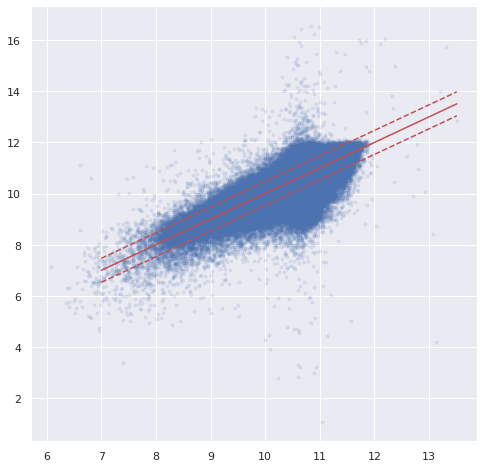

In [18]:
plt.figure(figsize=(8,8))
x = model_pred[:,0]
y = dep_vars_test['Chabrier_MILES_total_mass']
plt.scatter(x, y, alpha=0.1, marker='.')
plt.plot([7,x.max()], [7,x.max()], color='r')
plt.plot([7,x.max()], [7,x.max()] + rms, ls='--', color='r')
plt.plot([7,x.max()], [7,x.max()] - rms, ls='--', color='r')

In [19]:
# Error RMS para z
ztest = dep_vars_test['Z_NOQSO']
zpred = model_pred[:,1]
rms = np.sqrt(np.mean((ztest - zpred) ** 2))
rms

0.06426891401268464

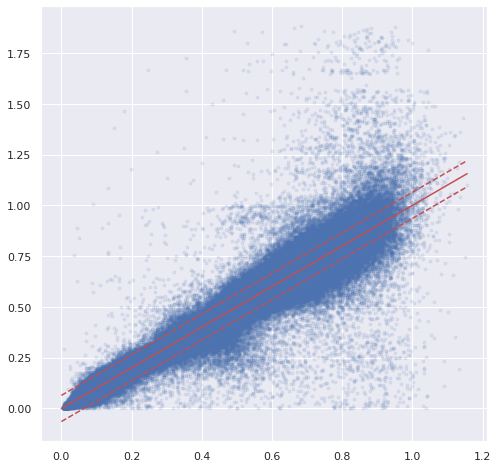

In [20]:
plt.figure(figsize=(8,8))
x = model_pred[:,1]
y = dep_vars_test['Z_NOQSO']
plt.scatter(x, y, alpha=0.1, marker='.')
plt.plot([0,x.max()], [0,x.max()], color='r')
plt.plot([0,x.max()], [0,x.max()] + rms, ls='--', color='r')
plt.plot([0,x.max()], [0,x.max()] - rms, ls='--', color='r')

In [34]:
def plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro):
    g = sns.jointplot(z_dist,mass_dist, kind="kde", fill=True)
    g.ax_joint.axvline(x=modelo.predict(ind_vars_test.iloc[obj_nro-1:obj_nro,:])[0,1],
                          linestyle='--',color='red')
    g.ax_joint.axhline(y=modelo.predict(ind_vars_test.iloc[obj_nro-1:obj_nro,:])[0,0],
                          linestyle='--',color='red')
    g.ax_marg_x.axvline(x=modelo.predict(ind_vars_test.iloc[obj_nro-1:obj_nro,:])[0,1],
                           linestyle='--', color='red')
    g.ax_marg_y.axhline(y=modelo.predict(ind_vars_test.iloc[obj_nro-1:obj_nro,:])[0,0],
                           linestyle='--', color='red')
    g.ax_joint.axvline(x=dep_vars_test['Z_NOQSO'].iloc[obj_nro-1],
                          linestyle='--',color='black')
    g.ax_joint.axhline(y=dep_vars_test['Chabrier_MILES_total_mass'].iloc[obj_nro-1],
                          linestyle='--',color='black')
    g.ax_marg_x.axvline(x=dep_vars_test['Z_NOQSO'].iloc[obj_nro-1], 
                           linestyle='--',color='black')
    g.ax_marg_y.axhline(y=dep_vars_test['Chabrier_MILES_total_mass'].iloc[obj_nro-1],
                           linestyle='--', color='black')
    if False:
        g.ax_joint.axvline(x=z_dist.mean(),
                              linestyle='--',color='green')
        g.ax_joint.axhline(y=mass_dist.mean(),
                              linestyle='--',color='green')
        g.ax_marg_x.axvline(x=z_dist.mean(),
                               linestyle='--', color='green')
        g.ax_marg_y.axhline(y=mass_dist.mean(),
                               linestyle='--', color='green')
    #plt.plot(0,20,color='red', marker='*',
    #                          markersize=10, linestyle='None')

In [21]:
%%time
train_trees = modelo.apply(ind_vars_train)
train_trees = np.array(train_trees)

CPU times: user 1min 20s, sys: 304 ms, total: 1min 20s
Wall time: 1min 20s


In [22]:
%%time
nro_samples_train = len(ind_vars_train)
Z_NOQSO = np.array(dep_vars_train['Z_NOQSO'])
Chabrier_MILES_total_mass = np.array(dep_vars_train['Chabrier_MILES_total_mass'])
ind_leaves = np.unique(train_trees)
n_trees = modelo.n_estimators

CPU times: user 8.08 s, sys: 76 ms, total: 8.15 s
Wall time: 8.15 s


In [23]:
global train_trees, nro_samples_train, Z_NOQSO, Chabrier_MILES_total_mass, ind_leaves, n_trees

In [24]:
obj_nro = 1
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
#obj = x_test[0]
#obj = obj.reshape(1, -1)

In [25]:
@njit(parallel=True)
def one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, z_NOQSO,
            Chabrier_MILES_total_mass, n_trees):
    cont = 0
    for tree in prange(n_trees):
        cont = cont + np.sum(id_leaf_obj[0,tree] == train_trees[:,tree])
    z_dist = np.zeros(cont)
    mass_dist = np.zeros(cont)
    j = 0
    for tree in range(n_trees):
        for sample in range(nro_samples_train):
            if train_trees[sample,tree] == id_leaf_obj[0,tree]:
                z_dist[j] = z_NOQSO[sample]
                mass_dist[j] = Chabrier_MILES_total_mass[sample]
                j += 1
    return z_dist, mass_dist

In [26]:
%%timeit
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)

202 ms ± 9.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


CPU times: user 1.31 s, sys: 100 ms, total: 1.41 s
Wall time: 456 ms


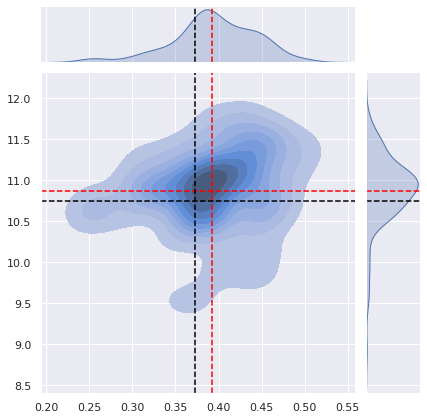

In [35]:
%%time
obj_nro = 5
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


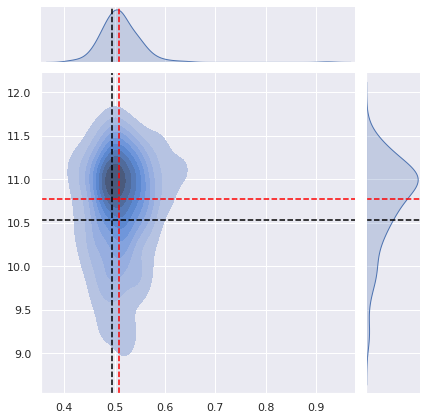

In [36]:
obj_nro = 50
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


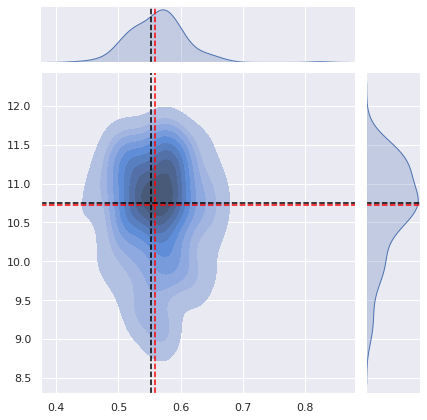

In [37]:
obj_nro = 200
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


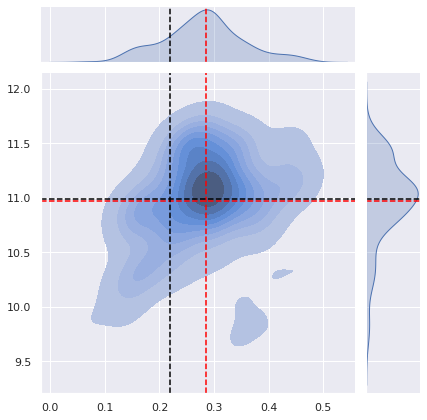

In [38]:
obj_nro = 400
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


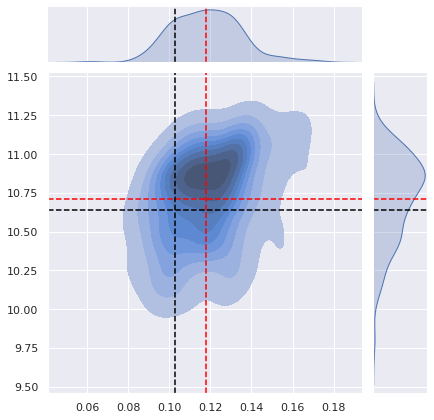

In [39]:
obj_nro = 600
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


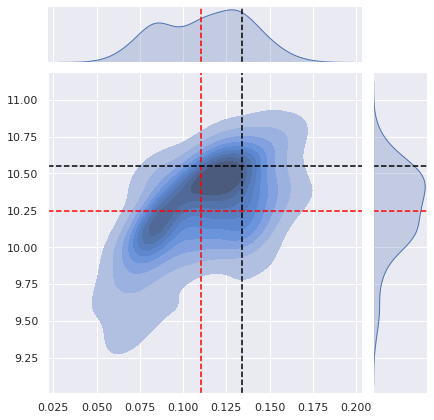

In [40]:
obj_nro = 1010
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


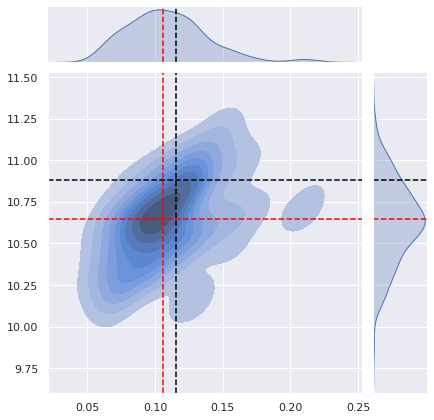

In [41]:
obj_nro = 2000
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


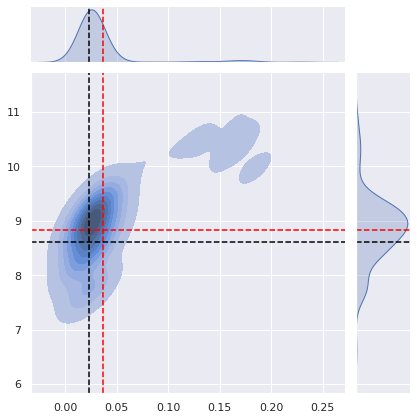

In [42]:
obj_nro = 1
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

In [42]:
# Cálculo de las dispersiones de las pdf
z_sigma = np.zeros(len(ind_vars_test))
mass_sigma = np.zeros(len(ind_vars_test))

In [43]:
global z_sigma, mass_sigma

In [41]:
%%time
for i in range(len(ind_vars_test)):
    if i%1000 == 0:
        print(i)
    obj_nro = i + 1
    obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
    id_leaf_obj = model_fit.apply(obj)
    z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
                Chabrier_MILES_total_mass, n_trees)
    z_sigma[i] = z_dist.std()
    mass_sigma[i] = mass_dist.std()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [42]:
np.sum(z_sigma < 0.03) / len(z_sigma)

0.45315892390728385

In [55]:
np.sum(mass_sigma < 0.5) / len(mass_sigma)

0.5983221806961684

In [36]:
%%timeit
for i in range(30):
    if i%1000 == 0:
        print(i)
    obj_nro = i + 1
    obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
    id_leaf_obj = model_fit.apply(obj)
    z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
                Chabrier_MILES_total_mass, n_trees)
    z_sigma[i] = z_dist.std()
    mass_sigma[i] = mass_dist.std()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6.36 s ± 64.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
objs = model_fit.apply(ind_vars_test)

In [30]:
global objs

In [65]:
@njit(parallel=True)
def fun(objs, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees):
    for i in range(30):
        #if i%1000 == 0:
        #    print(i)
        id_leaf_obj = objs[i,:]
        id_leaf_obj = id_leaf_obj.T
        cont = 0
        for tree in range(n_trees):
            cont = cont + np.sum(id_leaf_obj[tree] == train_trees[:,tree])
        z_dist = np.zeros(cont)
        mass_dist = np.zeros(cont)
        j = 0
        for tree in range(n_trees):
            for sample in range(nro_samples_train):
                if (train_trees[sample,tree] == id_leaf_obj[tree]):
                    z_dist[j] = Z_NOQSO[sample]
                    mass_dist[j] = Chabrier_MILES_total_mass[sample]
                    j += 1
        z_sigma[i] = np.std(z_dist)
        mass_sigma[i] = np.std(mass_dist)
        #return z_dist.std(), mass_dist.std()
    return z_sigma, mass_sigma

In [66]:
%%time
fun(objs, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function setitem>) found for signature:
 
 >>> setitem(readonly array(float64, 1d, C), int64, float64)
 
There are 16 candidate implementations:
[1m      - Of which 14 did not match due to:
      Overload of function 'setitem': File: <numerous>: Line N/A.
        With argument(s): '(readonly array(float64, 1d, C), int64, float64)':[0m
[1m       No match.[0m
[1m      - Of which 2 did not match due to:
      Overload in function 'SetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 176.
        With argument(s): '(readonly array(float64, 1d, C), int64, float64)':[0m
[1m       Rejected as the implementation raised a specific error:
         NumbaTypeError: [1mCannot modify readonly array of type: readonly array(float64, 1d, C)[0m[0m
  raised from /home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/numba/core/typing/arraydecl.py:183
[0m
[0m[1mDuring: typing of setitem at /tmp/ipykernel_8385/3341675461.py (21)[0m
[1m
File "../../../../../tmp/ipykernel_8385/3341675461.py", line 21:[0m
[1m<source missing, REPL/exec in use?>[0m


In [41]:
%%timeit
from joblib import Parallel, delayed
Parallel(n_jobs=25)(delayed(fun)(i) for i in range(30))

1min 20s ± 756 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
0
0
0
0
0
0
0
0


In [39]:
((((500000*6.36)/30)/60)/60)

29.444444444444446